In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score,r2_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
df= pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
# describe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


MISSING VALUE

In [5]:
# Menghitung jumlah nilai null pada setiap kolom
null_counts = df.isnull().sum()
null_counts

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

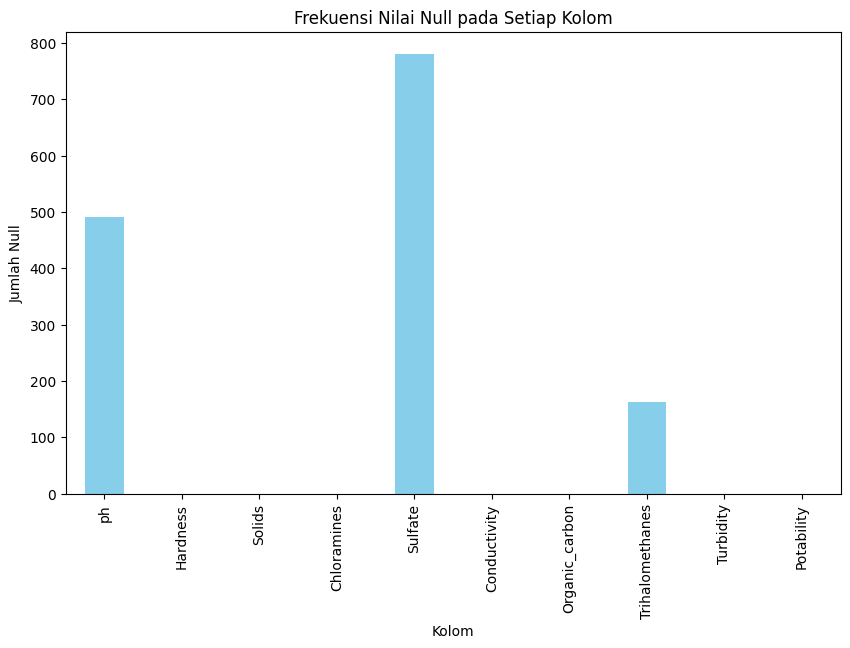

In [6]:
# Membuat bar chart frekuensi nilai null
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Frekuensi Nilai Null pada Setiap Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Null')
plt.show()

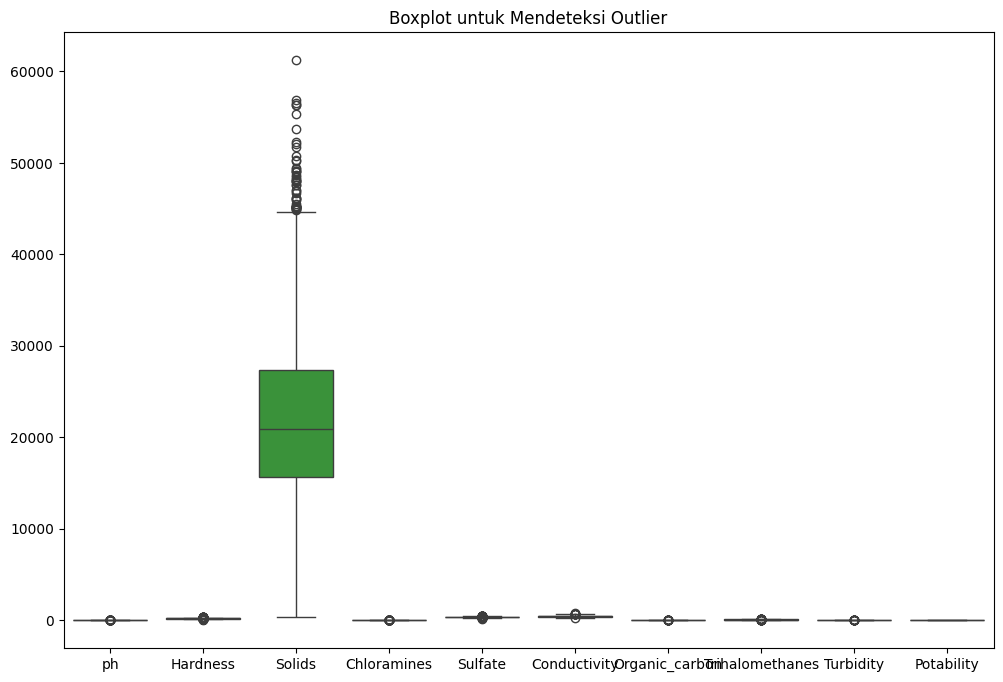

Outliers in column "ph":
             ph    Hardness        Solids  Chloramines     Sulfate  \
9     11.180284  227.231469  25484.508491     9.077200  404.041635   
80     1.844538  233.764343  28689.595778     7.724432         NaN   
104    2.612036  188.804126  34798.252587     6.796439         NaN   
128   11.180695  228.300860  16600.392747     6.094001         NaN   
204   11.267828  161.896362   6040.369868     7.205414         NaN   
263   13.175402   47.432000  19237.949676     8.907020  375.147315   
317   11.301794   77.459586  39227.619457     8.517986  337.501247   
354    2.798549  311.383956  26931.243483     7.116897         NaN   
692    1.757037  147.581831  41538.242730     7.728177  376.012933   
726    0.227499  152.530111  39028.599340     3.462492  283.693782   
783   11.898078  228.132673   8296.550611     9.899637  346.649750   
810    0.989912  133.216942  16922.853899     9.293289  444.375731   
1023  11.027880  228.322798  13124.105636     7.516643  319.35403

In [7]:
# Visualisasi boxplot untuk setiap kolom numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

# Mendeteksi outlier menggunakan IQR dan menampilkannya
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f'Outliers in column "{column}":\n{outliers}')

# Deteksi dan tampilkan outlier untuk setiap kolom numerik
numeric_columns = df.select_dtypes(include=['float64']).columns
for column in numeric_columns:
    detect_outliers(column)

PLOT SEBELUM HANDLE MISSING VALUE

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\3209684865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Potability', data=df, palette='viridis')


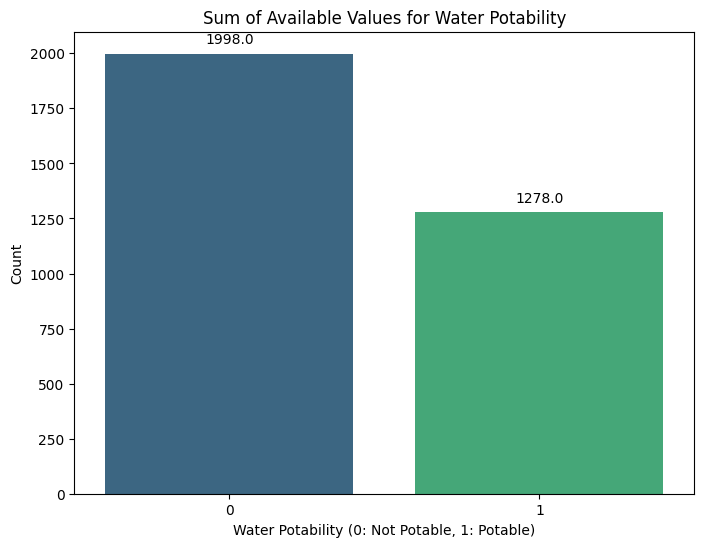

In [8]:
# Mengatur ukuran plot
plt.figure(figsize=(8, 6))

# Membuat countplot untuk potabilitas air
ax = sns.countplot(x='Potability', data=df, palette='viridis')

# Menambahkan label total nilai pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Sum of Available Values for Water Potability')
plt.xlabel('Water Potability (0: Not Potable, 1: Potable)')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data

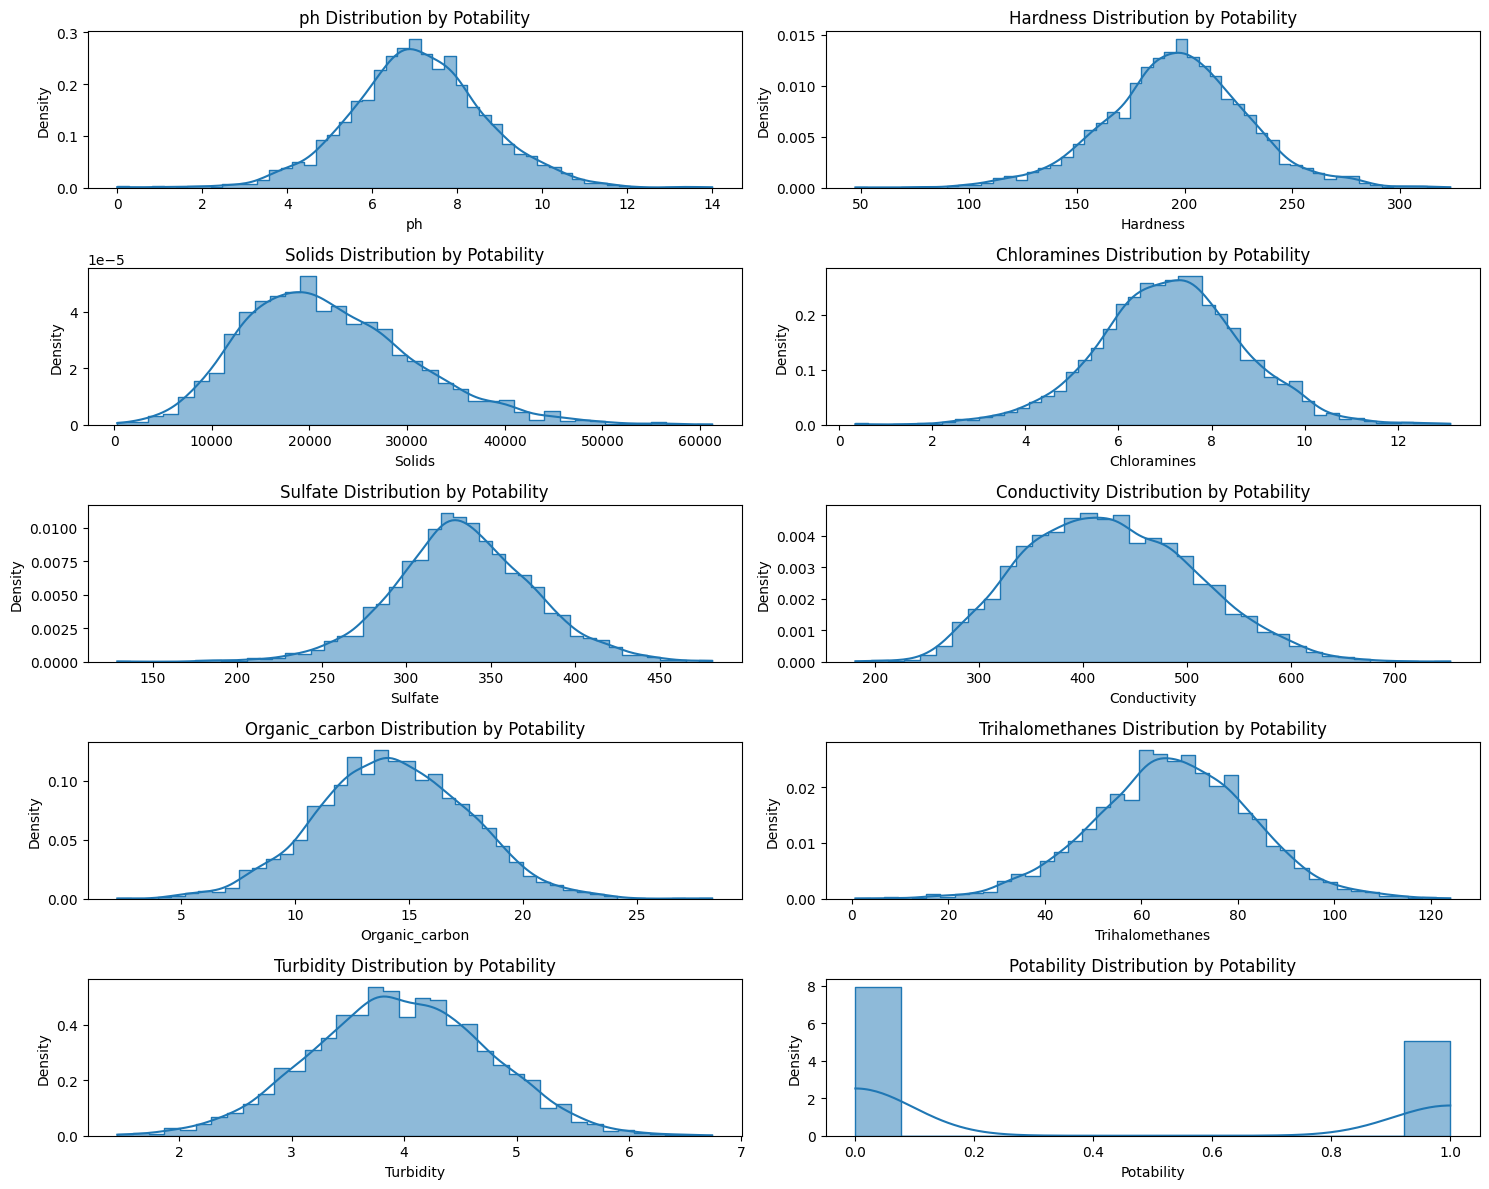

In [9]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Loop untuk membuat plot untuk setiap fitur
for i, feature in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)  # 3x3 grid untuk plot
    sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
    plt.title(f'{feature} Distribution by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

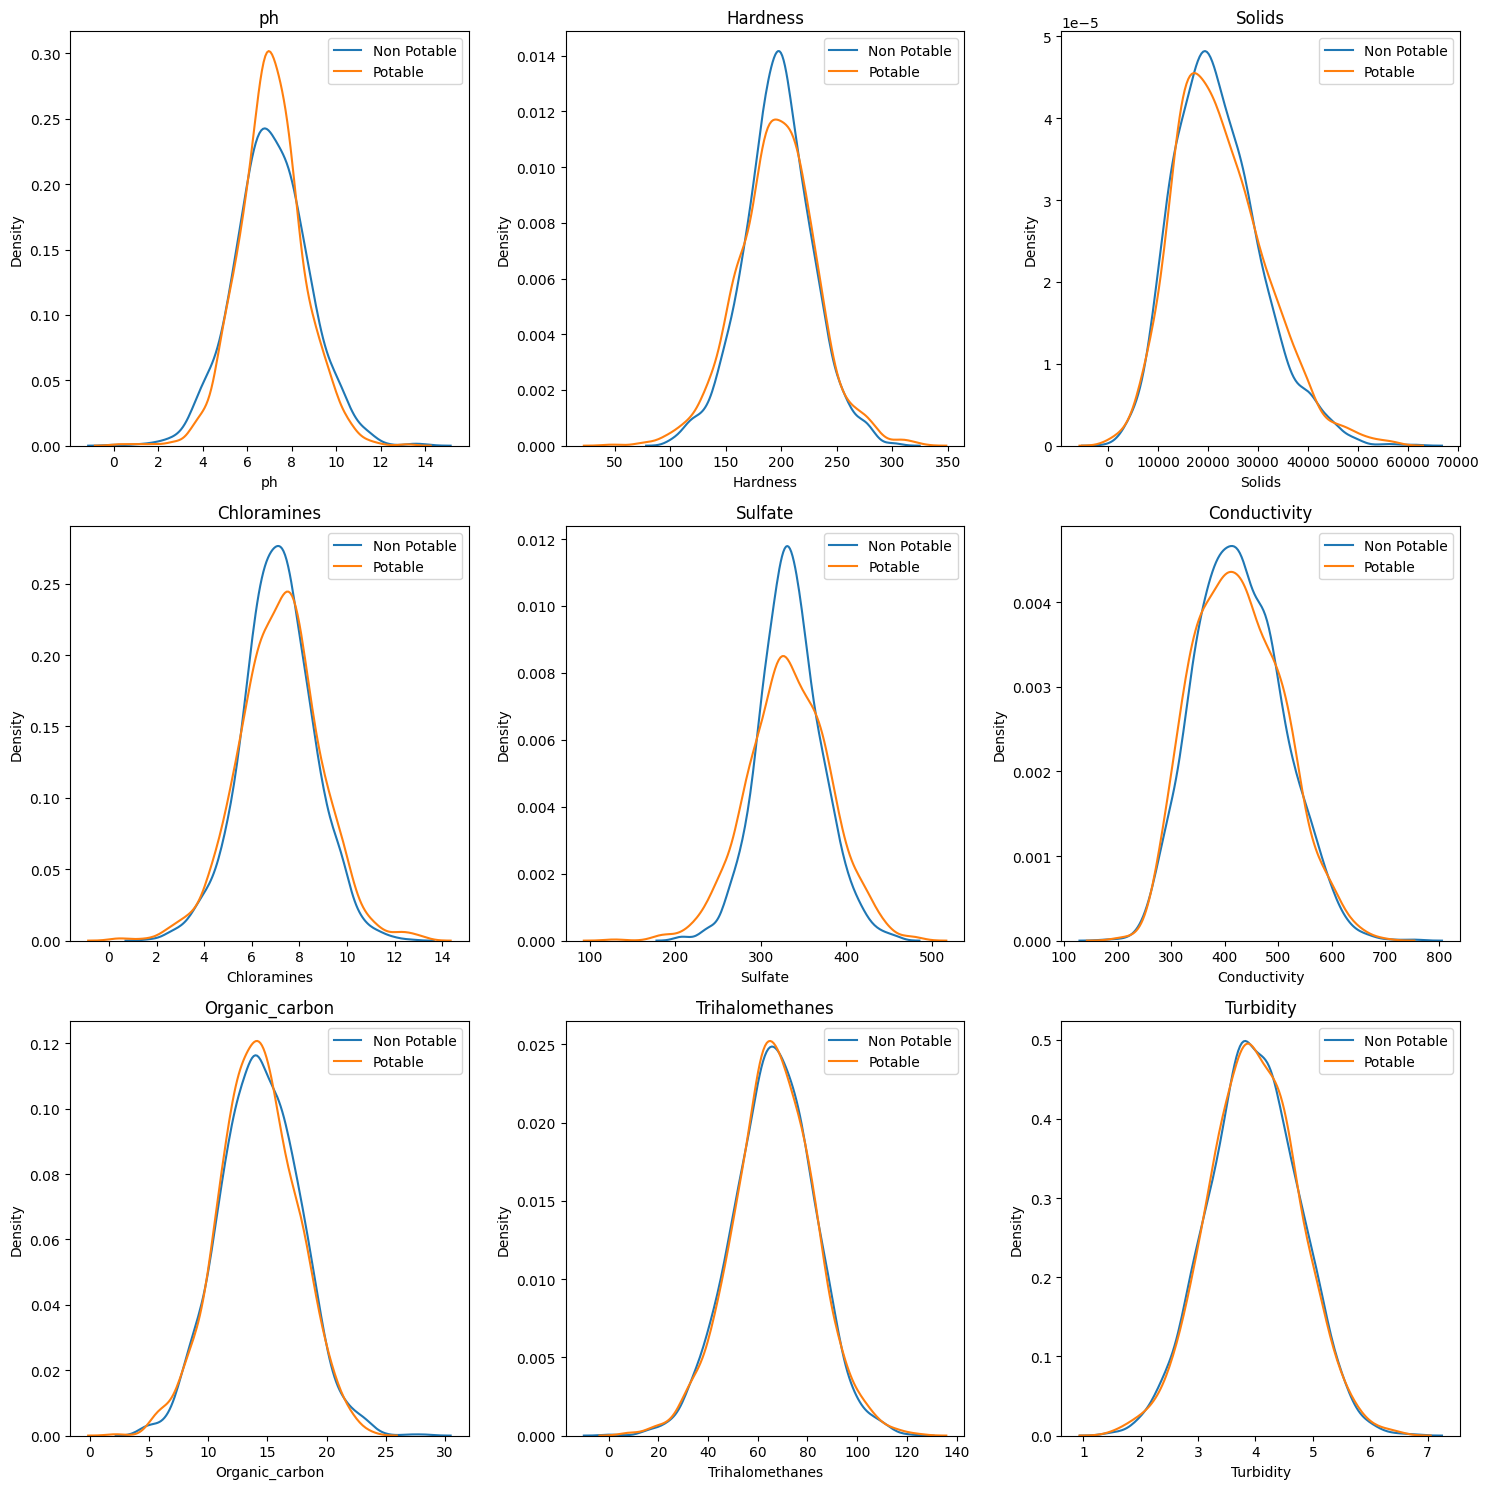

In [10]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

HANDLE MISSING VALUE

In [11]:
#Replacing null values
# df['ph'].fillna(value=df['ph'].mean(), inplace=True)
# df['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace=True)
# df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(), inplace=True)
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
# # Menangani outlier menggunakan IQR
# def handle_outliers(column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Menangani outlier
#     df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# # Loop untuk mendeteksi dan menangani outlier pada setiap kolom numerik
# numeric_columns = df.select_dtypes(include=['float64']).columns
# for column in numeric_columns:
#     handle_outliers(column)

# # Menampilkan data setelah menangani outlier
# print(df)

PLOT SETELAH HANDLE MISSING VALUE

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\819607095.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data

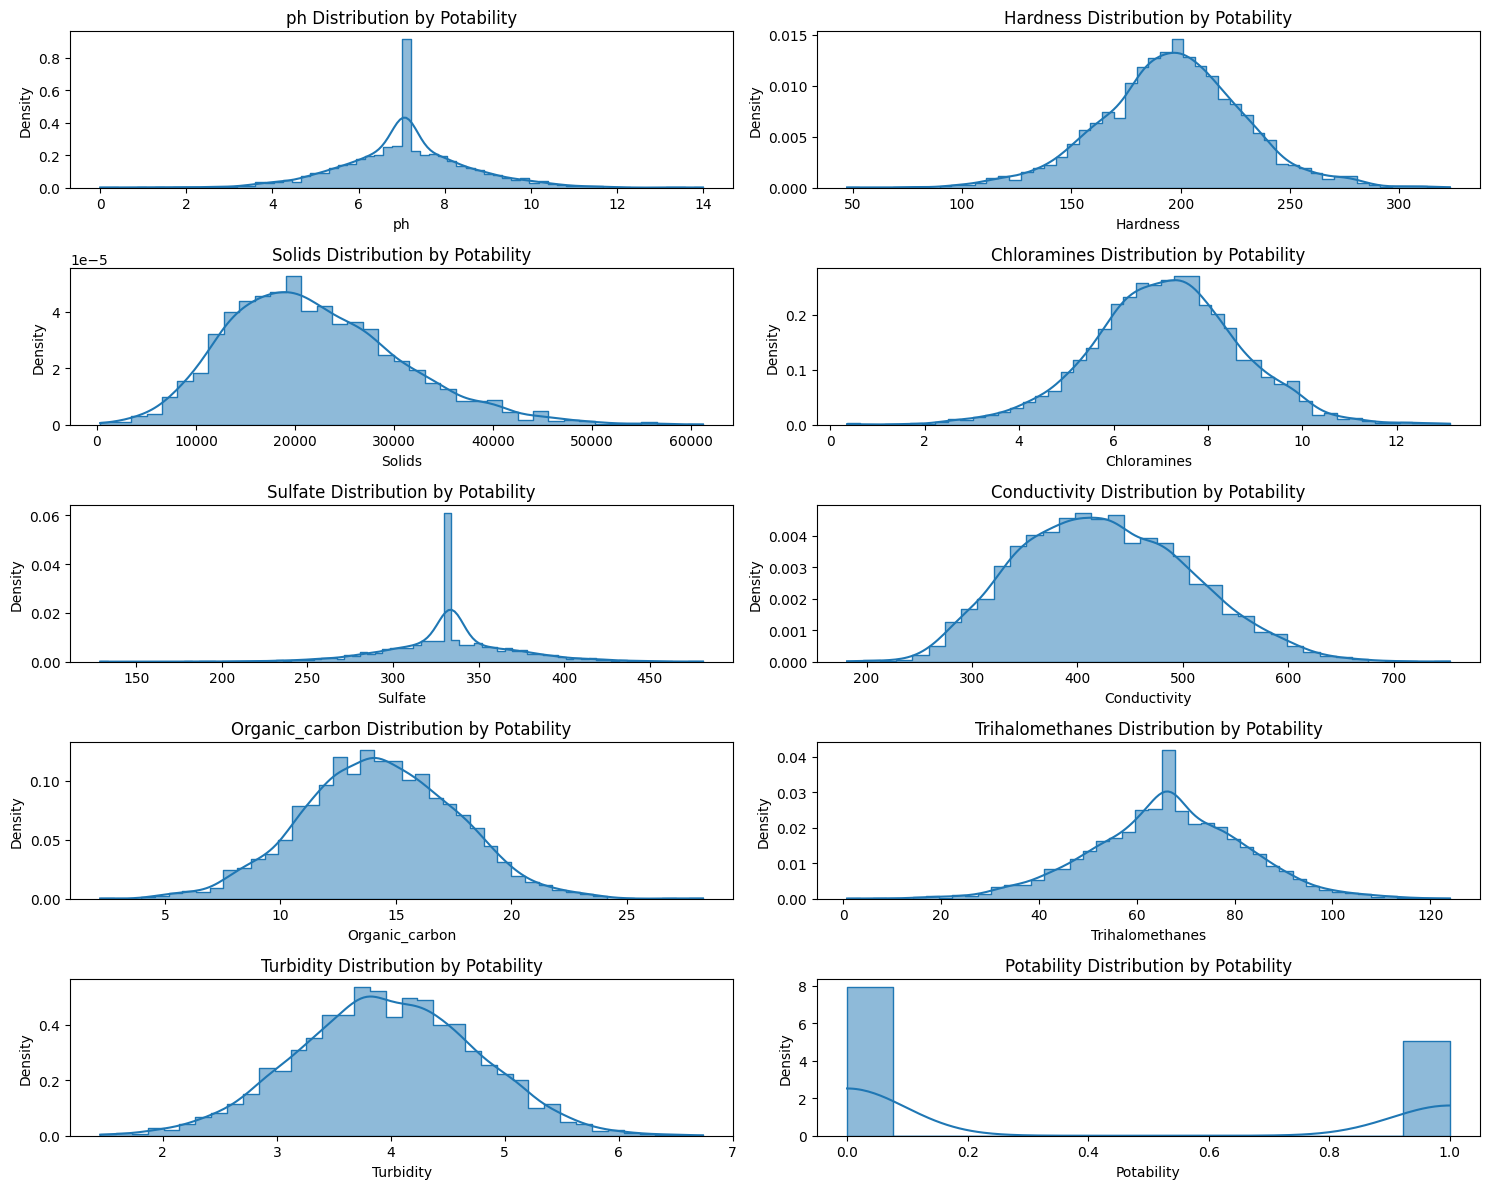

In [13]:
# Mengatur ukuran plot
plt.figure(figsize=(15, 12))

# Loop untuk membuat plot untuk setiap fitur
for i, feature in enumerate(df.columns, 1):
    plt.subplot(5, 2, i)  # 3x3 grid untuk plot
    sns.histplot(data=df, x=feature, element="step", stat="density", common_norm=False, kde=True, palette='muted', multiple="layer")
    plt.title(f'{feature} Distribution by Potability')
    plt.xlabel(feature)
    plt.ylabel('Density')

# Mengatur tata letak plot
plt.tight_layout()
plt.show()

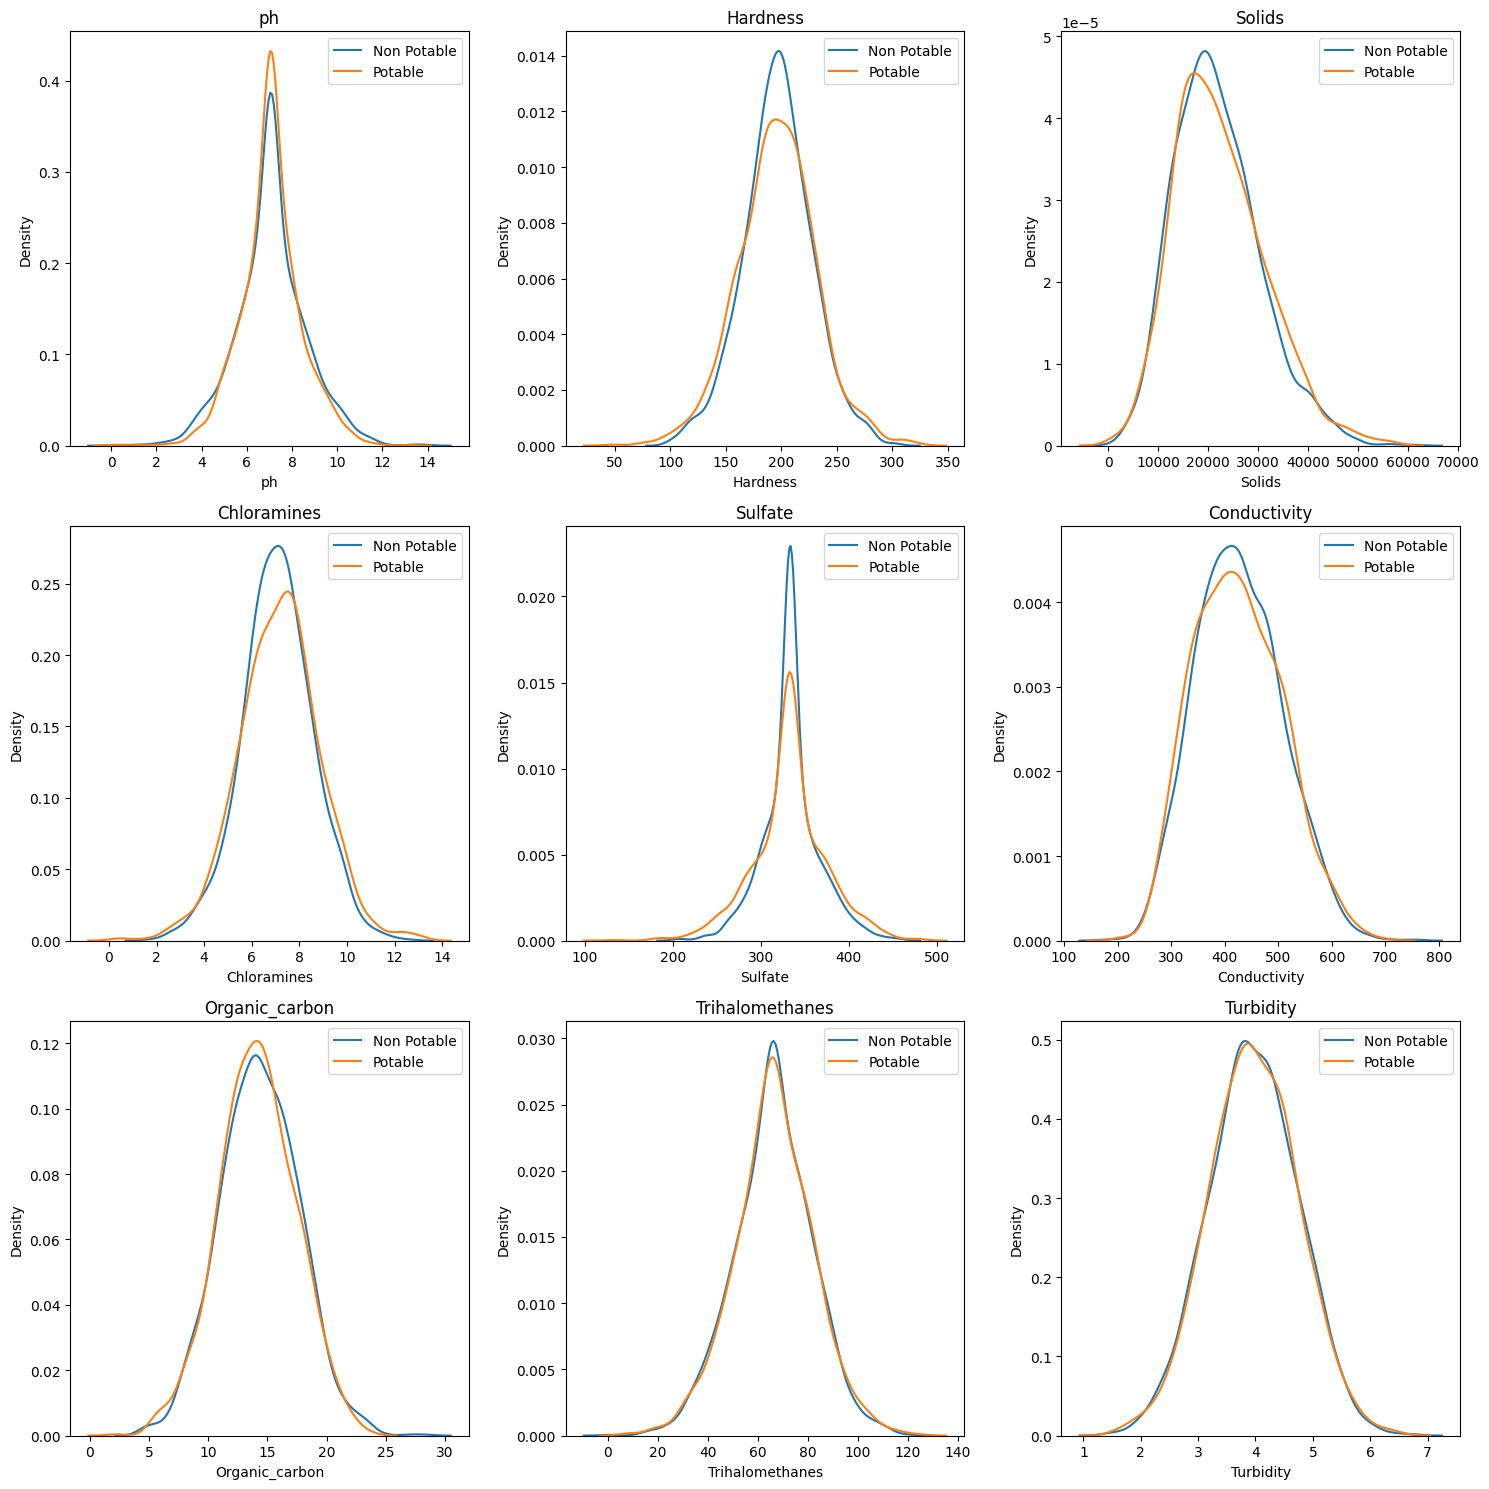

In [14]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()

plt.tight_layout()

HEATMAP KORELASI MATRIX

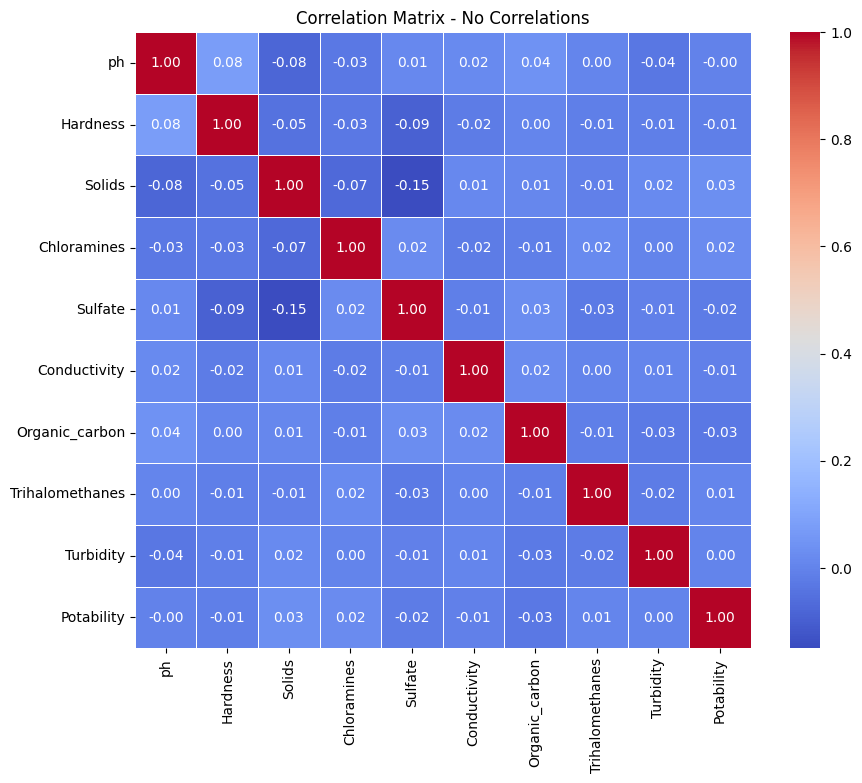

In [15]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap untuk matriks korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", square=True)

# Menambahkan judul
plt.title('Correlation Matrix - No Correlations')

# Menampilkan plot
plt.show()

SPLIT MODEL DATA TRAIN DAN TEST

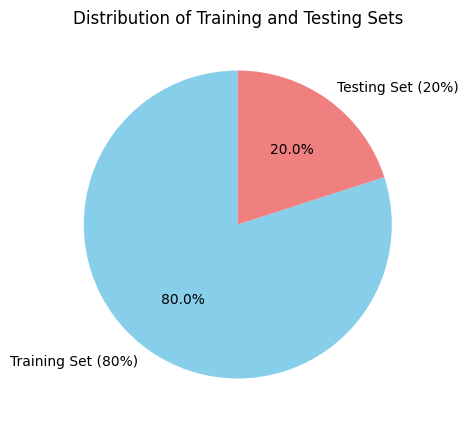

In [16]:
# Memisahkan fitur dan target
X = df.drop(['Potability'], axis=1)
y = df['Potability']

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Menampilkan pie chart untuk distribusi set pelatihan dan pengujian
plt.figure(figsize=(8, 5))

labels = ['Training Set (80%)', 'Testing Set (20%)']
sizes = [len(X_train), len(X_test)]
colors = ['skyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Training and Testing Sets')

plt.show()

MODEL RANDOM FOREST CLASSIFIER

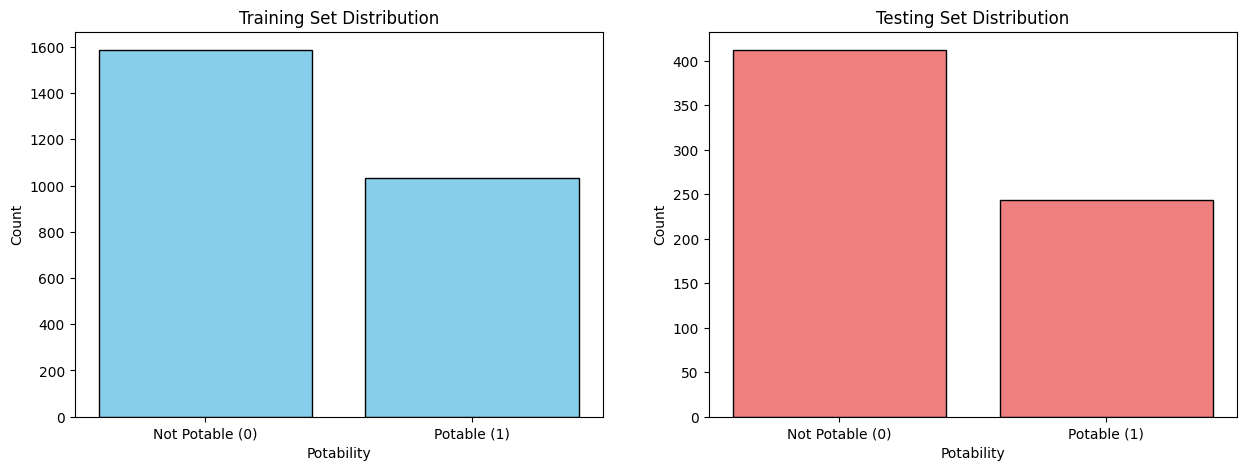

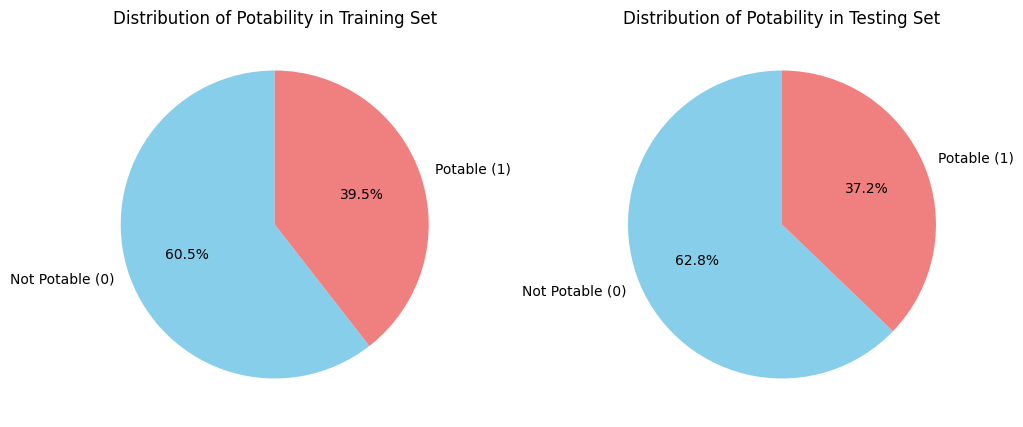

In [17]:
# Melatih model Random Forest Classifier
rf_clas = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=1)
# Train the model on the entire training set
rf_clas.fit(X_train, y_train)

# Menampilkan distribusi dataset ke dalam set pelatihan dan pengujian
plt.figure(figsize=(15, 5))

# Visualisasi dengan histogram
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=2, color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Training Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

plt.subplot(1, 2, 2)
plt.hist(y_test, bins=2, color='lightcoral', edgecolor='black', rwidth=0.8)
plt.title('Testing Set Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.xticks([0.25, 0.75], ['Not Potable (0)', 'Potable (1)'])

# Menampilkan pie chart untuk distribusi kelas pada set pelatihan
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
labels_train = ['Not Potable (0)', 'Potable (1)']
sizes_train = [y_train.value_counts()[0], y_train.value_counts()[1]]
colors_train = ['skyblue', 'lightcoral']

plt.pie(sizes_train, labels=labels_train, colors=colors_train, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Training Set')

# Menampilkan pie chart untuk distribusi kelas pada set pengujian
plt.subplot(1, 2, 2)
labels_test = ['Not Potable (0)', 'Potable (1)']
sizes_test = [y_test.value_counts()[0], y_test.value_counts()[1]]
colors_test = ['skyblue', 'lightcoral']

plt.pie(sizes_test, labels=labels_test, colors=colors_test, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Potability in Testing Set')

plt.show()

In [18]:
y_pred_clas = rf_clas.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_clas)
precision = precision_score(y_test, y_pred_clas)
recall = recall_score(y_test, y_pred_clas)
f1_score = f1_score(y_test, y_pred_clas)

# Menampilkan metrik evaluasi klasifikasi
print("Accuracy Score:", accuracy)
print("\nPrecision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1_score)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_clas))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_clas))


Accuracy Score: 0.6920731707317073

Precision Score: 0.6810344827586207
Recall Score: 0.3237704918032787
F1 Score: 0.4388888888888889

Confusion Matrix:
[[375  37]
 [165  79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.91      0.79       412
           1       0.68      0.32      0.44       244

    accuracy                           0.69       656
   macro avg       0.69      0.62      0.61       656
weighted avg       0.69      0.69      0.66       656



C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\852681812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")


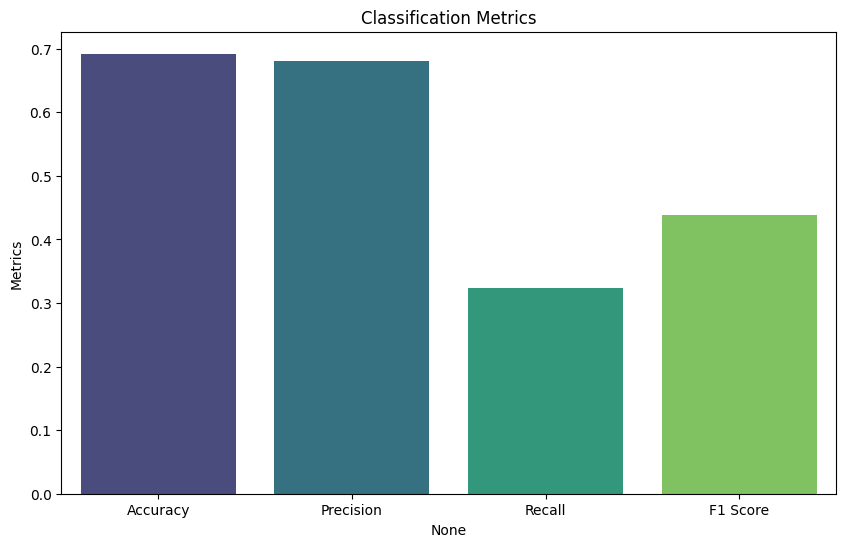

In [19]:
# Create a DataFrame for visualization
metrics_df = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}, index=['Metrics'])

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.transpose(), x=metrics_df.columns, y='Metrics', palette="viridis")
plt.title("Classification Metrics")
plt.show()

In [20]:
# ytrain_pred=rf.predict(X_train)
# print('The Mean Absolute Error is: %.2f'% mean_absolute_error(y_train, ytrain_pred))
# print('The Mean Square Error is: %.2f'% mean_squared_error(y_train, ytrain_pred))
# print('The Relative Mean Square Error is: %.2f'% np.sqrt(mean_absolute_error(y_train, ytrain_pred)))
# print('The Explianed Variance Score is: %.2f'% explained_variance_score(y_train, ytrain_pred))

FEATURE IMPORTANCE

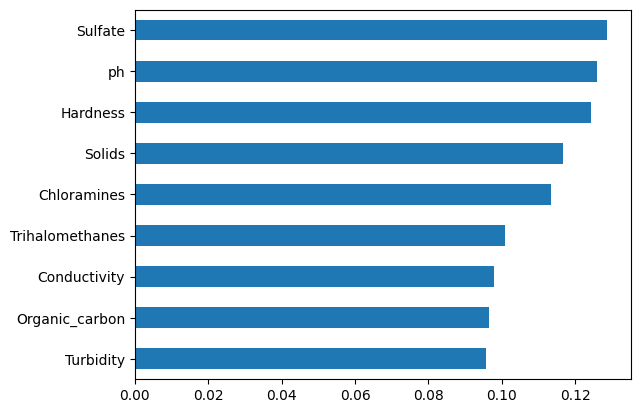

In [21]:
# Create and train the RandomForestClassifier
h = RandomForestClassifier(n_estimators=100, random_state=1)
h.fit(X_train, y_train)

# Get feature importances and create a horizontal bar plot
model_ranks = pd.Series(h.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')

In [22]:
mr=(model_ranks).sort_values(ascending= False)
print(mr)

Sulfate            0.128742
ph                 0.125928
Hardness           0.124321
Solids             0.116560
Chloramines        0.113434
Trihalomethanes    0.100813
Conductivity       0.097893
Organic_carbon     0.096560
Turbidity          0.095750
Name: Importance, dtype: float64


VISUALISASI KESALAHAN PREDIKSI

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\2554423950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Correct', data=df_errors, palette='viridis')


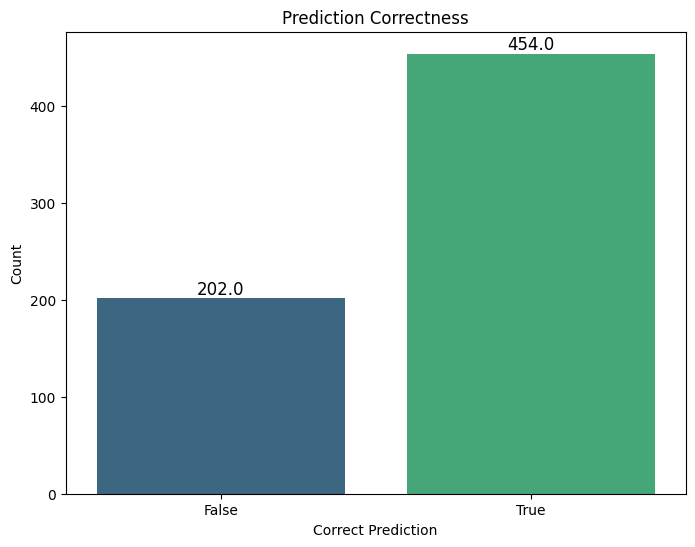

In [23]:
df_errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clas, 'Correct': y_test == y_pred_clas})

# Create a bar plot of prediction correctness
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Correct', data=df_errors, palette='viridis')
plt.title('Prediction Correctness')
plt.xlabel('Correct Prediction')
plt.ylabel('Count')

# Add actual values on top of the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

PERBANDINGAN AKURASI IMPLEMENTASI DENGAN YANG ADA DI PAPER

C:\Users\Airlangga\AppData\Local\Temp\ipykernel_41356\2109637066.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


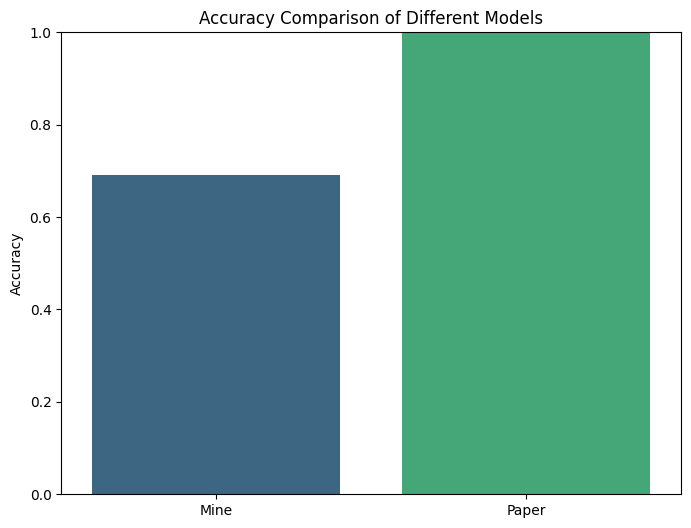

In [24]:
# Replace these with your actual accuracy scores
my_accuracy = accuracy_score(y_test, y_pred_clas)
paper_accuracy = 1

# Data preparation
models = ['Mine', 'Paper']
accuracy_scores = [my_accuracy, paper_accuracy]

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit to represent accuracy scores between 0 and 1
plt.ylabel('Accuracy')
plt.show()

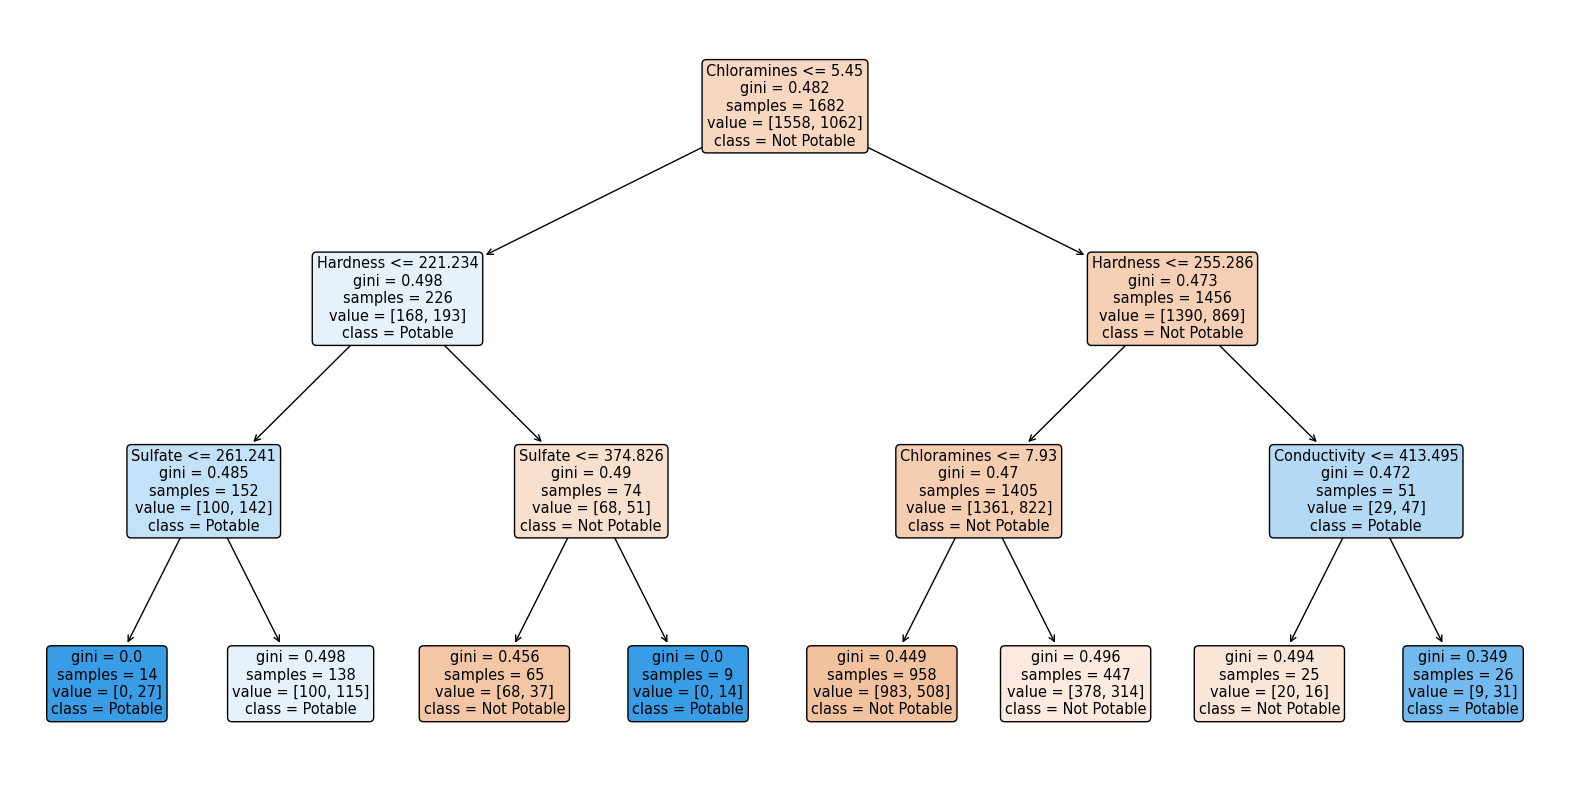

In [27]:
# Import library
from sklearn.tree import plot_tree
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Visualisasi pohon keputusan (hanya menunjukkan satu pohon, bukan keseluruhan ensemble)
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, class_names=['Not Potable', 'Potable'], filled=True, rounded=True)
plt.show()
